# American Ninja Warrior Scraping and Visualization

## By: Jeff Hale

## Plan

### Scrape American Ninja Warrior (ANW) contestant data over several years, combine the data into a DataFrame, and do some exploratory visual analysis.

## Background
[American Ninja Warrior](https://www.nbc.com/american-ninja-warrior) is a televised competition in whih contestents try to complete a serious of obstacles as quickly as possible, without falling. My kids love watching the show. Who knew it's been nominated for 3 Emmys?

Ten-time ninja warrior Matt Laessig also happens to lead [data.world](https://data.world), which offers a platform with data sets and an interface for data analysis. The platform has a data set on the obstacles and a link to a [Fantasy American Ninja Warrior](http://www.anwfantasy.com/members/contestants/season10.php) website that provides info about contestant results. 

Data for seasons 1 through 10 is on the website. In seasons 4 through 10 the show followed a similar format. Those are also the most recent seasons, so we'll focus on those. 

Let's get to it!

## Set-up
Load the necessary libraries.
Configure the Jupyter Notebook settings.
Load the data into a pandas DataFrame.

In [1]:
# install for binder so can render charts online
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install bs4
!pip install requests
!pip install seaborn
!pip install lxml

In [2]:
# essentials
import numpy as np 
import pandas as pd 

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# scraping
import requests
from bs4 import BeautifulSoup as bs 

# reproducibility
np.random.seed(34)

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

sns.set()

In [3]:
# !ls              # list the file in the working directory

In [4]:
# !pip list      # list the package version numbers for reproducibiity

We might get some predictive benefit if we could evaluate the affect of the completion rate of an obstacle has on its future inclusion. There is a site we could scrape that should give us that info (http://www.anwfantasy.com/members/contestants/season10.php).

## Scrape contestant obstacle failure data

Let's use Beautiful Soup with the requests package to scrape data from the anwfantasy.com site. 

We'll scrape with the lxml parser because it's faster than the default html parser. You'll need to have lxml installed to use that parser. See the [Beatiful Soup docs]( https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser).

In [5]:
result = requests.get("http://www.anwfantasy.com/members/contestants/season4.php")
c = result.content
soup = bs(c)

In [6]:
soup.find("a")

<a class="navbar-brand" href="/" style="margin-top:0px; padding-top:0px; background:none;"><img class="img img-responsive" src="/images/img-logo.png" style="max-width:130px;"/></a>

Alright, we're in! We were able to scrape a link as a test. Now let's get some data. We need to find out what page element, css class, or id we can latch onto to retrieve the data we need. 

Inspecting the code with Chrome (right click and select *Inspect*) shows that we want table row data ('tr').

In [7]:
table_rows = soup.find_all('tr')
table_rows[:5]

[<tr><th class="headerSlim" style="text-align:center" width="200"> </th>
 <th class="headerSlim" style="text-align:center" width="200"> </th>
 <th class="headerSlim" colspan="2" style="text-align:left;"><div style="border-bottom:solid 1px #307DBE; width:99%; padding-left:15px;">city qualifier</div></th>
 <th class="headerSlim" colspan="2" style="text-align:left; "><div style="border-bottom:solid 1px #307DBE; width:99%; padding-left:15px;">city final</div></th>
 <th class="headerSlim" colspan="2" style="text-align:left; "><div style="border-bottom:solid 1px #307DBE; width:99%; padding-left:15px;">stage 1</div></th>
 <th class="headerSlim" colspan="2" style="text-align:left; "><div style="border-bottom:solid 1px #307DBE; width:99%; padding-left:15px;">stage 2</div></th>
 <th class="headerSlim" colspan="2" style="text-align:left; "><div style="border-bottom:solid 1px #307DBE; width:99%; padding-left:15px;">stage 3</div></th>
 </tr>, <tr>
 <th class="header" style="width:250px">Name       

Let's loop through the table rows to get all the "td"s.

In [8]:
data_4 = []

for tr in table_rows:
    td = tr.find_all( 'td')
    row = [tr.text for tr in td]
    data_4.append(row)
    
df_s4 = pd.DataFrame(data_4, columns=[
    'fantasy_points', 
    'city_q_fail', 
    'city_q_time',
    'city_f_fail', 
    'city_f_time',
    'stage1_fail', 
    'stage1_time',
    'stage2_fail', 
    'stage2_time',
    'stage3_fail',
])

Let's add a column for stage4 that occurs in some later years. Let's also add a column to keep track of the year.

In [9]:
df_s4['stage4_fail'] = " "
df_s4['year'] = 4

In [10]:
df_s4.head()

,fantasy_points,city_q_fail,city_q_time,city_f_fail,city_f_time,stage1_fail,stage1_time,stage2_fail,stage2_time,stage3_fail,stage4_fail,year
0,None,None,None,None,None,None,None,None,None,None,,4
1,None,None,None,None,None,None,None,None,None,None,,4
2,27.5,complete (nw),58.55,complete (nw),163.7,Spinning Bridge,,,,,,4
3,39,complete (ms),53.99,complete (ms),143.22,Complete,98.29,Metal Spin,,,,4
4,39,complete (se),76.26,complete (se),132.44,Complete,101,Balance Tank,,,,4


Let's select all the rows other than the first two rows that contained header info, because we made our own shortened column names already. Let's reset the index, so it starts with 0, too.

In [11]:
df_s4 = df_s4.iloc[2:]
df_s4.reset_index(drop=True, inplace=True)
df_s4.head()

,fantasy_points,city_q_fail,city_q_time,city_f_fail,city_f_time,stage1_fail,stage1_time,stage2_fail,stage2_time,stage3_fail,stage4_fail,year
0,27.5,complete (nw),58.55,complete (nw),163.7,Spinning Bridge,,,,,,4
1,39,complete (ms),53.99,complete (ms),143.22,Complete,98.29,Metal Spin,,,,4
2,39,complete (se),76.26,complete (se),132.44,Complete,101,Balance Tank,,,,4
3,51.5,complete (sw),50.15,complete (sw),198.03,Complete,91,Complete,104.97,Hang Climb,,4
4,38,complete (se),62.24,complete (se),124.1,Complete,96.08,Unstable Bridge,,,,4


Now let's scrape the contestant names. They are stored in "<th>" elements. We'll use a for loop to loop through the table rows again. We'll make a list of lists and append the contestant data to the *data_4_contestants* list.

Then, as a check, we'll display the first few rows to make sure things look as expected. 

In [12]:
data_4_contestants = []

for tr in table_rows:
    th = tr.find_all('th')
    row = [tr.text for tr in th]
    data_4_contestants.append(row)

data_4_contestants[:5]

[['\xa0',
  '\xa0',
  'city qualifier',
  'city final',
  'stage 1',
  'stage 2',
  'stage 3'],
 ['Name\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0',
  'Fantasy Points',
  'Obstacle Failed',
  'Completion Time(s)',
  'Obstacle Failed',
  'Completion Time(s)',
  'Obstacle Failed',
  'Completion Time(s)',
  'Obstacle Failed',
  'Completion Time(s)',
  'Obstacle Failed'],
 ['David Campbell'],
 ['Paul Kasemir'],
 ['Travis Rosen']]

Alrighty, looking good. Now let's drop the header columns and make a DataFrame that excludes the first two lists with header data.

In [13]:
df_s4_contestants = pd.DataFrame(data_4_contestants[2:], columns=['contestant'])
df_s4_contestants.head()

,contestant
0,David Campbell
1,Paul Kasemir
2,Travis Rosen
3,Brent Steffensen
4,Drew Drechsel


Nice! Now we have just the contestants. Let's combine the DataFrames to reunite the contestants' names with their performance.

In [14]:
df_4_combo = df_s4.join(df_s4_contestants, how = "outer")
df_4_combo.head()

,fantasy_points,city_q_fail,city_q_time,city_f_fail,city_f_time,stage1_fail,stage1_time,stage2_fail,stage2_time,stage3_fail,stage4_fail,year,contestant
0,27.5,complete (nw),58.55,complete (nw),163.7,Spinning Bridge,,,,,,4,David Campbell
1,39,complete (ms),53.99,complete (ms),143.22,Complete,98.29,Metal Spin,,,,4,Paul Kasemir
2,39,complete (se),76.26,complete (se),132.44,Complete,101,Balance Tank,,,,4,Travis Rosen
3,51.5,complete (sw),50.15,complete (sw),198.03,Complete,91,Complete,104.97,Hang Climb,,4,Brent Steffensen
4,38,complete (se),62.24,complete (se),124.1,Complete,96.08,Unstable Bridge,,,,4,Drew Drechsel


In [15]:
df_4_combo.tail()

,fantasy_points,city_q_fail,city_q_time,city_f_fail,city_f_time,stage1_fail,stage1_time,stage2_fail,stage2_time,stage3_fail,stage4_fail,year,contestant
278,0,Quad Steps (mw),,,,,,,,,,4,Jacob Reeves
279,0,Quad Steps (mw),,,,,,,,,,4,Doug Smith
280,0,Quad Steps (se),,,,,,,,,,4,Daniel Vanegas
281,0,Quad Steps (se),,,,,,,,,,4,Cristille Boyd
282,0,Quad Steps (ne),,,,,,,,,,4,Bill Schlagter


Ok. Looks good. Let's name our main DataFrame "df" for ease of use.

In [16]:
df = df_4_combo

To get the data for years 5 through 10, let's make a loop that scrapes each year page and appends it to the DataFrame.

In Seasons 7-10 there is an extra column - "Stage4". We'll account for that as we're building our DataFrames.

These are the fun kinds of inconsistencies in data that come up in real-world scraping problems. 

The cell below could take a few minutes to run as it scrapes the data.

We'll also add the year as a column value.

In [17]:
def scrape_year(year):
    '''take the year as an integer and return the webpage data for ANW for that year'''
    result = requests.get(f"http://www.anwfantasy.com/members/contestants/season{year}.php")
    c = result.content
    soup = bs(c, "html")
    return soup

    
for year in range(5,11):
    soup = scrape_year(year)
    data = []
    data_contestants = []
    
    table_rows = soup.find_all('tr')

    for tr in table_rows:
        
        # find the row data other than the contestant names
        td = tr.find_all( 'td')
        row = [tr.text for tr in td]
        data.append(row)
        
        # find the contestant names
        th = tr.find_all('th')
        c_row = [tr.text for tr in th]
        data_contestants.append(c_row)
    
    # make DataFrame that excludes first two rows
    
    if year < 7:
        df_anw = pd.DataFrame(data[2:], columns=[
            'fantasy_points', 
            'city_q_fail', 
            'city_q_time',
            'city_f_fail', 
            'city_f_time',
            'stage1_fail', 
            'stage1_time',
            'stage2_fail', 
            'stage2_time',
            'stage3_fail',
            ])
        
        # add stage4 column because not present those years
        df_anw['stage4_fail'] = " "
        
    else: 
        df_anw = pd.DataFrame(data[2:], columns=[
            'fantasy_points', 
            'city_q_fail', 
            'city_q_time',
            'city_f_fail', 
            'city_f_time',
            'stage1_fail', 
            'stage1_time',
            'stage2_fail', 
            'stage2_time',
            'stage3_fail',
            'stage4_fail'
            ])
        
    # add year column
    df_anw['year'] = year
    
    # add contestant column
    df_contestants = pd.DataFrame(data_contestants[2:], columns=['contestant'])
    
    df_combined = df_anw.join(df_contestants, how = "outer")
   
    # append the year's results to existing dataframe
    df = pd.concat([df, df_combined])

df.tail()

,fantasy_points,city_q_fail,city_q_time,city_f_fail,city_f_time,stage1_fail,stage1_time,stage2_fail,stage2_time,stage3_fail,stage4_fail,year,contestant
295,35,Complete (MN),183.65,Complete (MN),385.31,Complete,134.42,Criss Cross Salmon Ladder,,,,10,Jonathan Stevens
296,4,Battering Ram (MN),Qualified,,,,,,,,,10,Garrett Lam
297,6,Diamond Dash (MN),Qualified,Diamond Dash (MN),,,,,,,,10,James Gomez
298,13,Diamond Dash (MN),Qualified,Iron Maiden (MN),Qualified,Double Dipper,,,,,,10,Danny Bergstrom
299,10,Diamond Dash (MN),Qualified,The Hinge (MN),,,,,,,,10,Julius Ferguson


In [18]:
df.head()

,fantasy_points,city_q_fail,city_q_time,city_f_fail,city_f_time,stage1_fail,stage1_time,stage2_fail,stage2_time,stage3_fail,stage4_fail,year,contestant
0,27.5,complete (nw),58.55,complete (nw),163.7,Spinning Bridge,,,,,,4,David Campbell
1,39,complete (ms),53.99,complete (ms),143.22,Complete,98.29,Metal Spin,,,,4,Paul Kasemir
2,39,complete (se),76.26,complete (se),132.44,Complete,101,Balance Tank,,,,4,Travis Rosen
3,51.5,complete (sw),50.15,complete (sw),198.03,Complete,91,Complete,104.97,Hang Climb,,4,Brent Steffensen
4,38,complete (se),62.24,complete (se),124.1,Complete,96.08,Unstable Bridge,,,,4,Drew Drechsel


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 299
Data columns (total 13 columns):
fantasy_points    1960 non-null object
city_q_fail       1960 non-null object
city_q_time       1960 non-null object
city_f_fail       1960 non-null object
city_f_time       1960 non-null object
stage1_fail       1960 non-null object
stage1_time       1960 non-null object
stage2_fail       1960 non-null object
stage2_time       1960 non-null object
stage3_fail       1960 non-null object
stage4_fail       1960 non-null object
year              1960 non-null int64
contestant        1960 non-null object
dtypes: int64(1), object(12)
memory usage: 214.4+ KB


## Clean contestant data

Let's lowercase everything. 

In [20]:
string_cols = list(df.select_dtypes(include=['object']).columns)
string_cols

for col in string_cols:
    df[col] = df[col].str.lower()
df.head()

,fantasy_points,city_q_fail,city_q_time,city_f_fail,city_f_time,stage1_fail,stage1_time,stage2_fail,stage2_time,stage3_fail,stage4_fail,year,contestant
0,27.5,complete (nw),58.55,complete (nw),163.7,spinning bridge,,,,,,4,david campbell
1,39,complete (ms),53.99,complete (ms),143.22,complete,98.29,metal spin,,,,4,paul kasemir
2,39,complete (se),76.26,complete (se),132.44,complete,101,balance tank,,,,4,travis rosen
3,51.5,complete (sw),50.15,complete (sw),198.03,complete,91,complete,104.97,hang climb,,4,brent steffensen
4,38,complete (se),62.24,complete (se),124.1,complete,96.08,unstable bridge,,,,4,drew drechsel


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 299
Data columns (total 13 columns):
fantasy_points    1960 non-null object
city_q_fail       1960 non-null object
city_q_time       1960 non-null object
city_f_fail       1960 non-null object
city_f_time       1960 non-null object
stage1_fail       1960 non-null object
stage1_time       1960 non-null object
stage2_fail       1960 non-null object
stage2_time       1960 non-null object
stage3_fail       1960 non-null object
stage4_fail       1960 non-null object
year              1960 non-null int64
contestant        1960 non-null object
dtypes: int64(1), object(12)
memory usage: 214.4+ KB


## Initial Observations
Finally, time to have a look around. Initial question:

How many people are repeat contestants (over years 4 to 10)?

In [22]:
df.contestant.value_counts()

drew drechsel          7
lance pekus            7
flip rodriguez         7
david campbell         7
brian arnold           7
tremayne dortch        7
jamie rahn             7
michael bernardo       7
travis rosen           7
james mcgrath          7
brian kretsch          7
brent steffensen       7
andrew lowes           7
ryan stratis           7
alan connealy          6
reko rivera            6
kevin klein            6
chris wilczewski       6
dan polizzi            6
michelle warnky        6
jared woods            6
michael silenzi        6
joe moravsky           6
lorin ball             6
abel gonzalez          5
jessie graff           5
jon stewart            5
ian dory               5
kevin bull             5
brett sims             5
                      ..
john sapinoso          1
chris warnky           1
cristille boyd         1
tessa souter mecham    1
eric totten            1
leland frataccia       1
douglas chick          1
chad smith             1
scott redding          1


Let's make the *fantasy_points* column numeric so we can do more meaningful things with it.

In [23]:
df['fantasy_points'] = pd.to_numeric(df['fantasy_points'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1960 entries, 0 to 299
Data columns (total 13 columns):
fantasy_points    1959 non-null float64
city_q_fail       1960 non-null object
city_q_time       1960 non-null object
city_f_fail       1960 non-null object
city_f_time       1960 non-null object
stage1_fail       1960 non-null object
stage1_time       1960 non-null object
stage2_fail       1960 non-null object
stage2_time       1960 non-null object
stage3_fail       1960 non-null object
stage4_fail       1960 non-null object
year              1960 non-null int64
contestant        1960 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 214.4+ KB


Quite a few folks are repeaters. Let's make a histogram by count with the pandas matplotlib API.

Text(0.5, 0, 'Competitions')

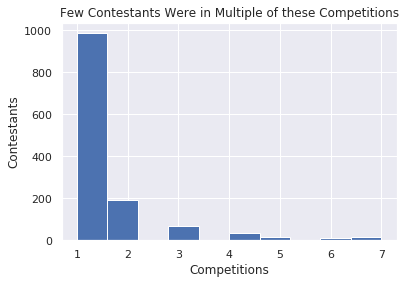

In [24]:
df.contestant.value_counts().hist()
plt.title("Few Contestants Were in Multiple of these Competitions")
plt.ylabel("Contestants")
plt.xlabel("Competitions")

Let's make the same chart in Seaborn just for fun and improved visualization.

/srv/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Competitions')

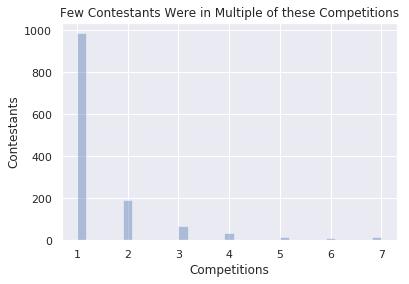

In [25]:
counters = df.contestant.value_counts()
sns.distplot(counters, kde=False)
plt.title("Few Contestants Were in Multiple of these Competitions")
plt.ylabel("Contestants")
plt.xlabel("Competitions")

Looks like maybe a slight improvement in clarity. 

We can see that the vast majority of folks who competed over these seven seasons only competed in one season. Very few folks are out at the tail of this positively skewed distribution.

Let's group by individual counts and see what the count data look like for the leaders.

In [26]:
df_cons = df.groupby(['contestant']).count()

In [27]:
df_cons.head()

,fantasy_points,city_q_fail,city_q_time,city_f_fail,city_f_time,stage1_fail,stage1_time,stage2_fail,stage2_time,stage3_fail,stage4_fail,year
contestant,,,,,,,,,,,,
a.j. amores,1,1,1,1,1,1,1,1,1,1,1,1
aaron branch,1,1,1,1,1,1,1,1,1,1,1,1
aaron cooke,2,2,2,2,2,2,2,2,2,2,2,2
aaron himelright,2,2,2,2,2,2,2,2,2,2,2,2
aaron rayburn,1,1,1,1,1,1,1,1,1,1,1,1


Sort the 

In [28]:
df_cons_sorted = df_cons.sort_values(by="fantasy_points", ascending=False)
df_cons_sorted.head(20)

,fantasy_points,city_q_fail,city_q_time,city_f_fail,city_f_time,stage1_fail,stage1_time,stage2_fail,stage2_time,stage3_fail,stage4_fail,year
contestant,,,,,,,,,,,,
drew drechsel,7,7,7,7,7,7,7,7,7,7,7,7
david campbell,7,7,7,7,7,7,7,7,7,7,7,7
tremayne dortch,7,7,7,7,7,7,7,7,7,7,7,7
jamie rahn,7,7,7,7,7,7,7,7,7,7,7,7
andrew lowes,7,7,7,7,7,7,7,7,7,7,7,7
travis rosen,7,7,7,7,7,7,7,7,7,7,7,7
flip rodriguez,7,7,7,7,7,7,7,7,7,7,7,7
brian kretsch,7,7,7,7,7,7,7,7,7,7,7,7
brent steffensen,7,7,7,7,7,7,7,7,7,7,7,7


Looks like almost no one makes it to stage 4. Strange there isn't a time column for stage 3. 

## Fantasy Points

What are those fantasy points anyway? According to the [website](http://www.anwfantasy.com/how-to-play/), points are scored as follows.

    1 point for every obstacle cleared!

    2 points for City Qualifier course clear
    4 points for City Finals course clears
    4 points for Midoriyama/Las Vegas Stage 1 clears
    6 points for Midoriyama/Las Vegas Stage 2 clears
    8 points for Midoriyama/Las Vegas Stage 3 clears
    10 points for Total Victory
    Additonally a 0.5 point bonus is awarded to the fastest runner for each timed stage

    For example Geoff Britten's "Perfect Season" is scored:
    • 2pts for City Qualifier cleared + 6 obstacles cleared +
    • 4pts for City Finals cleared + 10 obstacles cleared (+0.5 fastest bonus) +
    • 4pts for Stage 1 cleared + 8 obstacles cleared +
    • 6pts for Stage 2 cleared + 6 obstacles cleared (+0.5 fastest bonus) +
    • 8pts for Stage 3 cleared + 8 obstacles cleared +
    • 10pts for Stage 4 cleared + 1 obstacle cleared =
    74 total points!

Interesting. So there's a small time component in those scores, but mostly its about clearing obstacles and stages.

Let's total the contestant's fantasy points over all time and sort to see who has the most. We need to reset the index so we keep the fantasy_points as a column.

In [29]:
df_fantasy = df.groupby(['contestant']).sum().sort_values(by="fantasy_points", ascending=False).reset_index()
df.head()

,fantasy_points,city_q_fail,city_q_time,city_f_fail,city_f_time,stage1_fail,stage1_time,stage2_fail,stage2_time,stage3_fail,stage4_fail,year,contestant
0,27.5,complete (nw),58.55,complete (nw),163.7,spinning bridge,,,,,,4,david campbell
1,39.0,complete (ms),53.99,complete (ms),143.22,complete,98.29,metal spin,,,,4,paul kasemir
2,39.0,complete (se),76.26,complete (se),132.44,complete,101,balance tank,,,,4,travis rosen
3,51.5,complete (sw),50.15,complete (sw),198.03,complete,91,complete,104.97,hang climb,,4,brent steffensen
4,38.0,complete (se),62.24,complete (se),124.1,complete,96.08,unstable bridge,,,,4,drew drechsel


Let's drop the year column that comes along for the groupby ride.

In [30]:
df_fantasy.drop('year', axis='columns', inplace=True)

In [31]:
df_fantasy.head(10)

,contestant,fantasy_points
0,drew drechsel,261.5
1,joe moravsky,253.5
2,brian arnold,242.0
3,travis rosen,217.0
4,jamie rahn,195.0
5,james mcgrath,186.0
6,flip rodriguez,183.0
7,ian dory,174.5
8,brent steffensen,172.0
9,ryan stratis,168.0


Looks like Drew Drechsel has more fantasy points than anyone else. Congrats, Drew!

In [32]:
df_fantasy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 2 columns):
contestant        1324 non-null object
fantasy_points    1324 non-null float64
dtypes: float64(1), object(1)
memory usage: 20.8+ KB


Let's make a little chart of the top 20 folks.

In [33]:
df_fantasy['fantasy_points'] = pd.to_numeric(df_fantasy['fantasy_points'])
df_fantasy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 2 columns):
contestant        1324 non-null object
fantasy_points    1324 non-null float64
dtypes: float64(1), object(1)
memory usage: 20.8+ KB


Text(0.5, 6.799999999999979, 'Contestant')

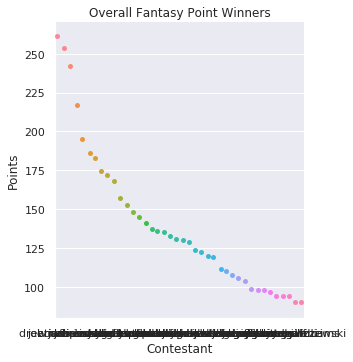

In [34]:
sns.catplot(x='contestant', y='fantasy_points', data=df_fantasy.head(40))
plt.title("Overall Fantasy Point Winners")
plt.ylabel("Points")
plt.xlabel("Contestant")

It's a bit tricky to read the names of top 40 fantasy scorers, eh? The plotly library does a nicer job of auto-formatting the text. Let's rotate the name vertically.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

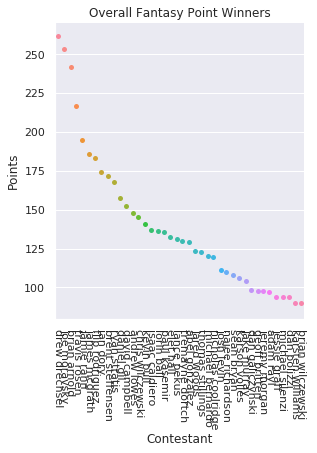

In [35]:
sns.catplot(x='contestant', y='fantasy_points', data=df_fantasy.head(40))
plt.title("Overall Fantasy Point Winners")
plt.ylabel("Points")
plt.xlabel("Contestant")
plt.xticks(rotation=-90)

Better. But we still need a wider figure.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

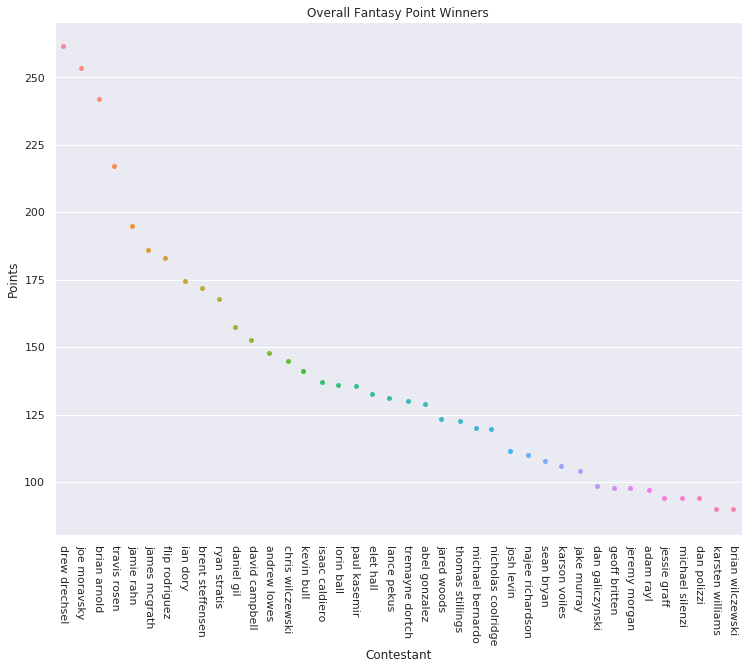

In [36]:
sns.catplot(x='contestant', y='fantasy_points', data=df_fantasy.head(40), height=8, aspect=11/8)
plt.title("Overall Fantasy Point Winners")
plt.ylabel("Points")
plt.xlabel("Contestant")
plt.xticks(rotation=-90)

Ah, much nicer. And we should capitalize the first letter of each name too. The Pandas string method *capitalize* is what we want.

In [37]:
df_fantasy['contestant'] = df_fantasy['contestant'].str.title()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

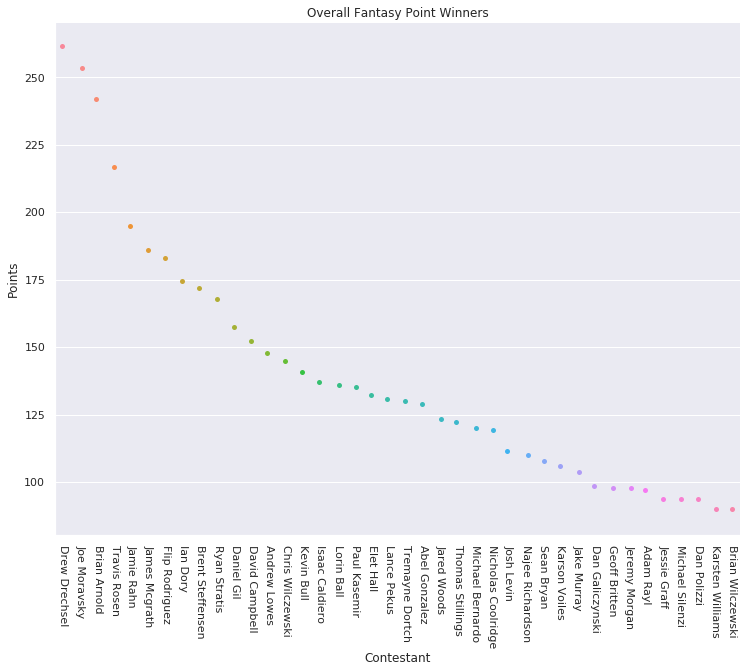

In [38]:
sns.catplot(x='contestant', y='fantasy_points', data=df_fantasy.head(40), height=8, aspect=11/8)
plt.title("Overall Fantasy Point Winners")
plt.ylabel("Points")
plt.xlabel("Contestant")
plt.xticks(rotation=-90)

## Wrap and Future Directions

In this Juptyer notebook you saw how to scrape data from a website and read it into a Pandas DataFrame in tidy data format. You saw how to manipulate the data to get information out of it and how to visualize the data.

There are several ways you could extend this project.

You could try to use historical fantasy points to predict future performance. 

Maybe a decrease in fantasy points over time tells us a compeitor is unlikely to advance further in future rounds. You could feature engineer a column for change in fantasy points over time.

It might also be interesting to try to predict contestant success with more contestant data. For example, it would be great to have additional demographic data (e.g. age, height, weight, career) and athletic performance data (e.g. vertical jump, max squat, 40yd sprint time), but I don't believe such data exists. 

Were the contestants who made it through obstacles the fastest more likely to go further in the competition? 

Finally, it might be fruitful to combine obstacle information with contestant data to try to predict contestant success.
